<a href="https://colab.research.google.com/github/Clarice-Satiko-Aoto/b2b-analyis/blob/feat/vendasB2B_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [44]:
!pip install prophet


In [73]:
#importar bibliotecas
import pandas as pd
import numpy as np
# from darts import TimeSeries
from prophet import Prophet

#plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

#warnings
import warnings
warnings.filterwarnings("ignore")

# Carregar arquivos

In [9]:
# descrever o que é o arquivo
df_fore = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vendas/data/tratado/historico_completo.csv",
                      parse_dates=['data'],
                      usecols=['data', 'valor_venda', 'UF', 'gerente_id', 'categoria_descricao','produto_descricao', 'item_quantidade'])


In [11]:
df_fore.columns

Index(['data', 'valor_venda', 'item_quantidade', 'UF', 'gerente_id',
       'produto_descricao', 'categoria_descricao'],
      dtype='object')

In [110]:
df_filtro = (
    df_fore
    .query("categoria_descricao=='Manga Curta' & gerente_id==2 & UF=='SP' & produto_descricao=='Canadense'")[['data', 'item_quantidade']]
    .sort_values('data')
    # .set_index('data')
    # .resample(rule='M')['item_quantidade'].sum()
    # .reset_index()
    )
df_filtro.columns = ['ds', 'y']

In [111]:
prophet = Prophet(growth='flat')
prophet.fit(df_filtro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsxok43d/c1o54fl_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsxok43d/ouxy2xiu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52073', 'data', 'file=/tmp/tmpjsxok43d/c1o54fl_.json', 'init=/tmp/tmpjsxok43d/ouxy2xiu.json', 'output', 'file=/tmp/tmpjsxok43d/prophet_modeldp02x_5g/prophet_model-20231120004158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:41:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:41:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [112]:
future = prophet.make_future_dataframe(periods=3, freq='M')
future.head()

,ds
0,2021-02-17
1,2021-02-18
2,2021-02-22
3,2021-02-25
4,2021-03-01


In [113]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
136,2023-10-06,1.146591,0.427867,1.923928
137,2023-10-12,1.146881,0.413384,1.985056
138,2023-10-31,0.915289,0.098124,1.706983
139,2023-11-30,1.142350,0.445971,1.898574
140,2023-12-31,1.128063,0.374437,1.882273


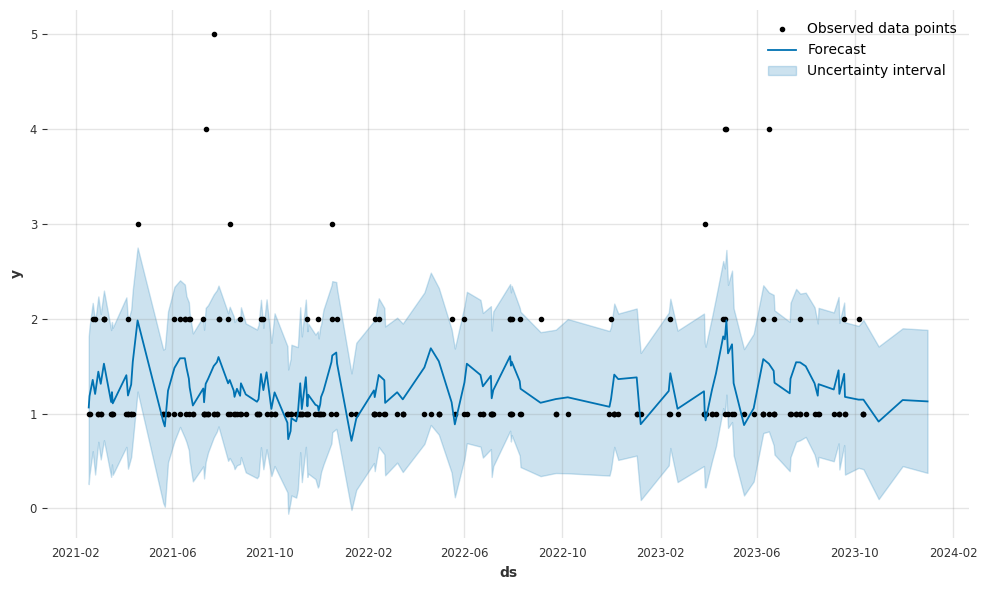

In [114]:
fig = prophet.plot(forecast, include_legend=True)

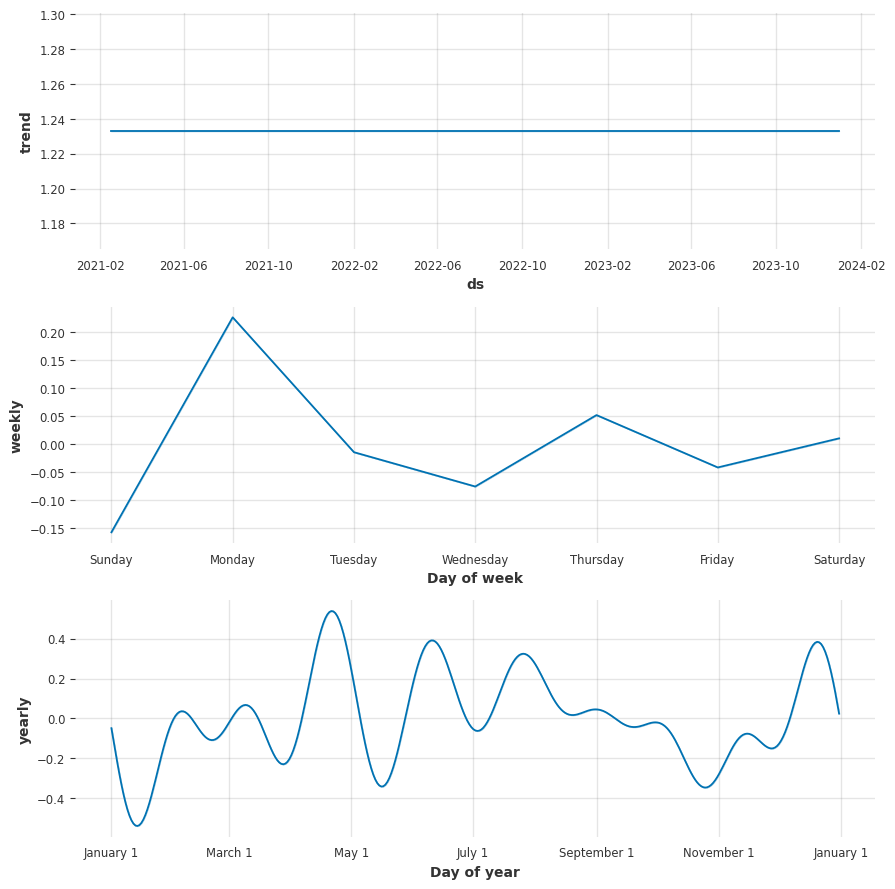

In [115]:
fig2 = prophet.plot_components(forecast)

In [116]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(prophet, forecast)

In [117]:
plot_components_plotly(prophet, forecast)

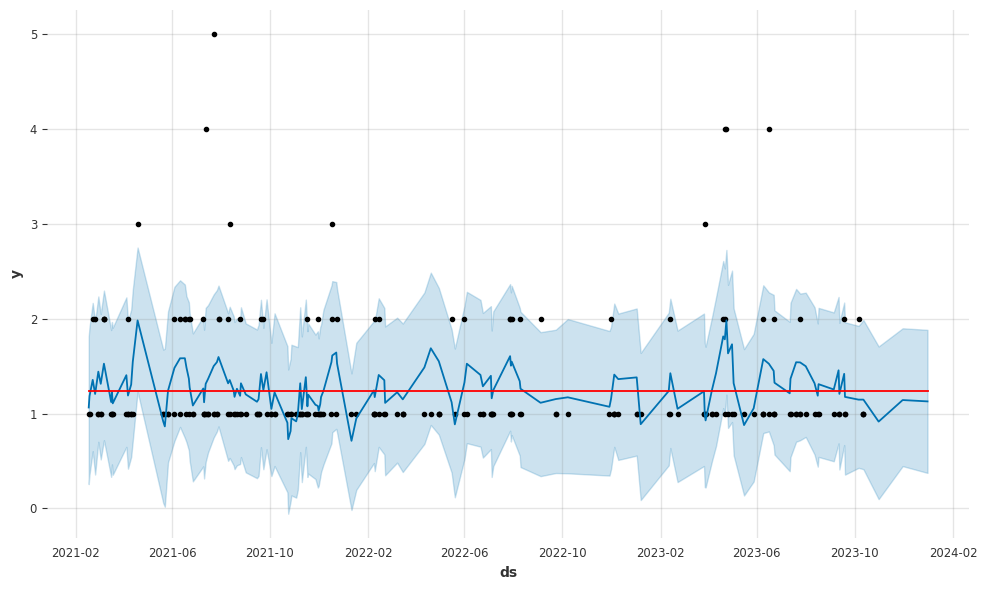

In [118]:
from prophet.plot import add_changepoints_to_plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)


In [119]:
# Crie um DataFrame com os pontos reais (dados históricos)
real_data = df_filtro.rename(columns={'y': 'Vendas'})

# Crie um gráfico de linha interativo usando Plotly
fig = px.line(forecast, x='ds', y='yhat', title='Previsão de Vendas Mensais no Estado de São Paulo (Gerente Gabriel, Categoria Manga Curta, produto Canadense)')
fig.add_scatter(x=real_data['ds'], y=real_data['Vendas'], mode='markers', name='Vendas Reais')
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Qtd')
fig.update_traces(name='Real')  # Adiciona a etiqueta 'Previsão' à linha de previsão
fig.show()

In [120]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(prophet, horizon=30)

INFO:prophet:Making 65 forecasts with cutoffs between 2022-02-20 23:59:59.999999970 and 2023-10-11 23:59:59.999999970


  0%|          | 0/65 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsxok43d/uscb6tc5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsxok43d/b71jf_87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46945', 'data', 'file=/tmp/tmpjsxok43d/uscb6tc5.json', 'init=/tmp/tmpjsxok43d/b71jf_87.json', 'output', 'file=/tmp/tmpjsxok43d/prophet_modelkwj9br_l/prophet_model-20231120004436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:44:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:44:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsxok43d/kdsxeu1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsxok43d/1sj0asf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [121]:
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-02-21,1.488800,0.707803,2.196001,1.0,2022-02-20 23:59:59.999999970
1,2022-02-22,1.013906,0.276223,1.731421,1.0,2022-02-21 23:59:59.999999970
2,2022-03-09,1.481139,0.752083,2.201481,1.0,2022-03-08 23:59:59.999999970
3,2022-03-16,1.293619,0.586914,2.053688,1.0,2022-03-15 23:59:59.999999970
4,2022-03-16,1.293619,0.569037,1.983273,1.0,2022-03-15 23:59:59.999999970


In [122]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 00:00:00.000000030,0.528595,0.727045,0.546227,0.430604,0.351705,0.370869,0.77
